<a href="https://colab.research.google.com/github/chipojaya1/Machine-Learning-I/blob/main/Practical_Assignment_2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DNSC6314 Assignment 2 by Chipo Jaya: G44454879**
- Feature Information: Bike Data
- This project continues with Capital Bikeshare data from https://ride.capitalbikeshare.com/system-data

- Data is from three months: **2024/02, 2024/03 and 2024/04.**

## <font color="red"> Note: acknowledgement of GenAI used <font>
"DeepSeek AI (Version 1.0, developed by DeepSeek AI, accessed February 13, 2025)" was consulted during the research process.

### Getting started

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# cloning github repository to access data
!git clone https://github.com/chipojaya1/Machine-Learning-I.git

Cloning into 'Machine-Learning-I'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 80 (delta 34), reused 0 (delta 0), pack-reused 20 (from 2)
Receiving objects: 100% (80/80), 50.28 MiB | 6.61 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Updating files: 100% (7/7), done.


In [116]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [117]:
# loading data
df_Feb = pd.read_csv('/content/Machine-Learning-I/202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('/content/Machine-Learning-I/202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('/content/Machine-Learning-I/202404-capitalbikeshare-tripdata.csv')

# merging the data
df_bike=pd.concat([df_Feb, df_Mar,df_Apr])

In [118]:
# getting to know the data
print(f"Bike data shape: {df_bike.shape}")
print()

df_bike.info()
print()

df_bike.head()

Bike data shape: (1245899, 13)

<class 'pandas.core.frame.DataFrame'>
Index: 1245899 entries, 0 to 490264
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1245899 non-null  object 
 1   rideable_type       1245899 non-null  object 
 2   started_at          1245899 non-null  object 
 3   ended_at            1245899 non-null  object 
 4   start_station_name  1061748 non-null  object 
 5   start_station_id    1061748 non-null  float64
 6   end_station_name    1052421 non-null  object 
 7   end_station_id      1052253 non-null  float64
 8   start_lat           1245899 non-null  float64
 9   start_lng           1245899 non-null  float64
 10  end_lat             1244884 non-null  float64
 11  end_lng             1244884 non-null  float64
 12  member_casual       1245899 non-null  object 
dtypes: float64(6), object(7)
memory usage: 133.1+ MB



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Focus on GWSB Station: '22nd & H St NW'

### Bike Availability: Number of Pickups

In [119]:
# Convert the 'started_at' column to datetime objects
df_bike['started_at_date'] = pd.to_datetime(df_bike['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df_bike[df_bike['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

,started_at_date
started_at_date,
2024-02-01,33
2024-02-02,23
2024-02-03,22
2024-02-04,18
2024-02-05,19
...,...
2024-04-26,33
2024-04-27,18
2024-04-28,36


## Dock Availability: Number of Dropoffs

In [120]:
# Convert the 'ended_at' column to datetime objects
df_bike['ended_at_date'] = pd.to_datetime(df_bike['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df_bike[df_bike['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

,ended_at_date
ended_at_date,
2024-02-01,33
2024-02-02,25
2024-02-03,20
2024-02-04,19
2024-02-05,23
...,...
2024-04-26,39
2024-04-27,24
2024-04-28,28


## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [121]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.
PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'
PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts


,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


## Visualize pickups and dropoffs

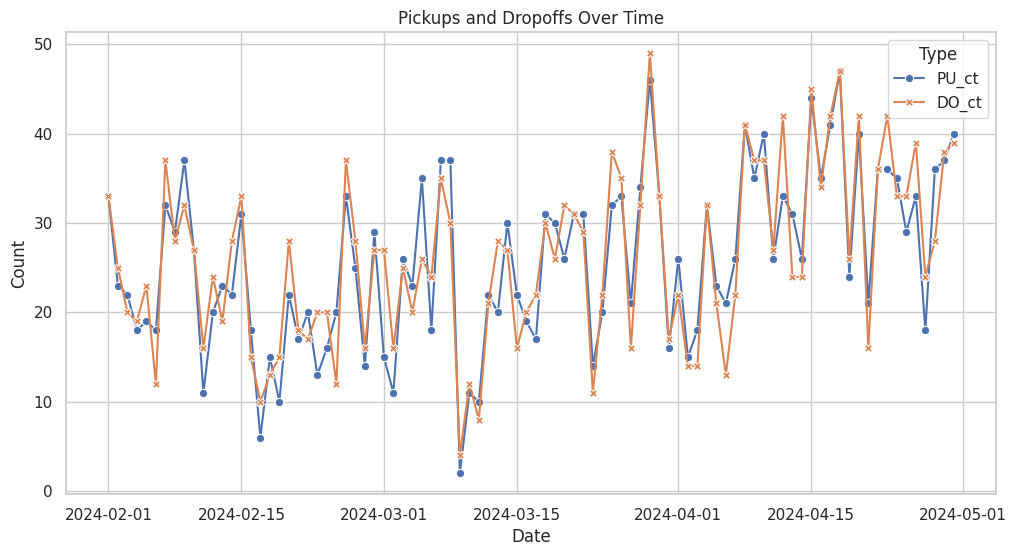

In [122]:
# Convert PU_DO_counts to long format
PU_DO_long = pd.melt(PU_DO_counts.reset_index(), id_vars=['date'],
                     value_vars=['PU_ct', 'DO_ct'],
                     var_name='Type', value_name='Count')

# plot line chart showing the PU_count and DO_count over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=PU_DO_long, x='date', y='Count', hue='Type', style='Type',
             markers=True, dashes=False)

# customizing the chart
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickups and Dropoffs Over Time')
plt.legend(title='Type')
plt.grid(True)
plt.show()

# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [123]:
# loading weather data
df_weather = pd.read_csv('/content/Machine-Learning-I/DC_weather_2024.csv')
df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


In [124]:
# getting to know the weather dataset
print(f"weather data shape: {df_weather.shape}")
print()

df_weather.info()
print()

weather data shape: (366, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        134 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    float64
 16  windgust     

## Drop variables of your choice

In [125]:
# dropping unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          366 non-null    object 
 1   tempmax           366 non-null    float64
 2   tempmin           366 non-null    float64
 3   temp              366 non-null    float64
 4   feelslikemax      366 non-null    float64
 5   feelslikemin      366 non-null    float64
 6   feelslike         366 non-null    float64
 7   dew               366 non-null    float64
 8   humidity          366 non-null    float64
 9   precip            366 non-null    float64
 10  precipprob        366 non-null    int64  
 11  precipcover       366 non-null    float64
 12  snow              366 non-null    float64
 13  snowdepth         366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

## Prepare X and y: Merge df_weather with PU_DO_counts

In [126]:
# converting the 'datetime' column to datetime objects and extracting the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# merging the dataframes by date
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')
merged_df

,date,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,33,33,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,23,25,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,22,20,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,18,19,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,19,23,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,33,39,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,18,24,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,36,28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,37,38,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


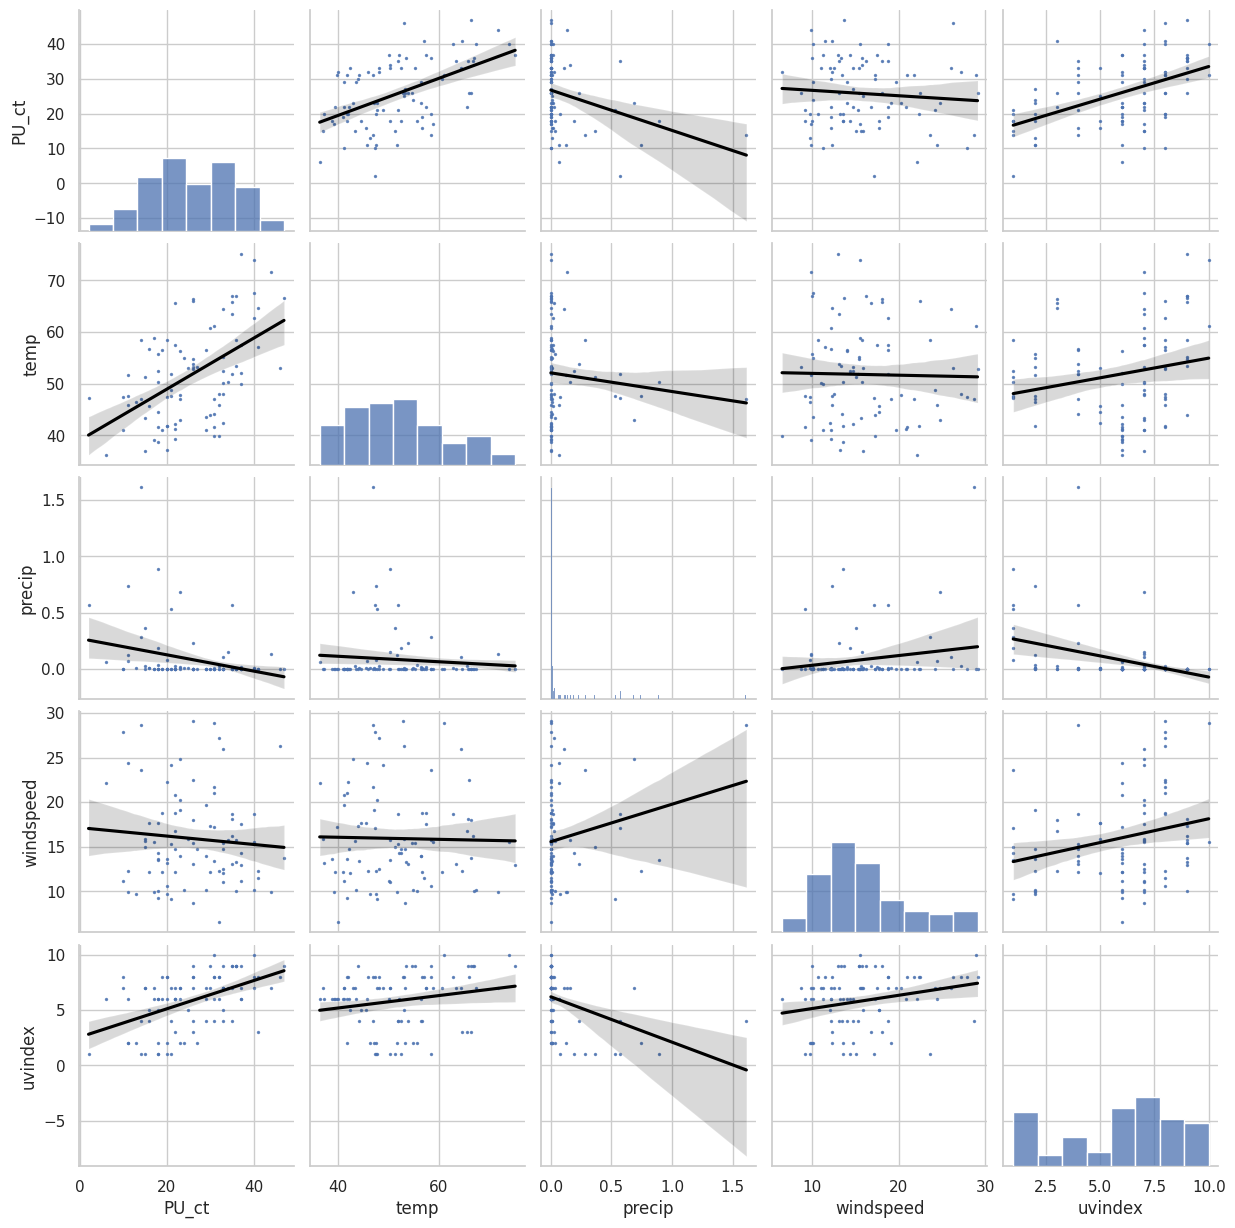

In [127]:
# pairplot for mergerd df
sns.pairplot(merged_df[['PU_ct',"temp", "precip", "windspeed","uvindex"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

# Prepare training and test data

In [128]:
# defining the features and target variables
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


## <font color="red"> Important: train_test_split with y=['PU_ct','DO_ct']. Why? <font>

# **Assignment 2: Classification Models**

### As we discussed in class, our intuition is to allocate more bikes if PU_ct > DO_ct; and less bikes if PU_ct < DO_ct. Thus, in this assignment, we want to predict whether PU_ct > DO_ct. We first create a new target variable to indicate whether PU_ct > DO_ct.

## <font color="red"> Additional Preprocessing Steps <font>

### Create categorical target variable

In [129]:
# loading the necessary libraries
from sklearn.model_selection import train_test_split

# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 200) # 40% test data

In [130]:
# creating the target variable to show 1 if Pick ups is greater than drop offs, 0 otherwise
y_train['PU_gt_DO'] = y_train['PU_ct'] > y_train['DO_ct']
y_test['PU_gt_DO'] = y_test['PU_ct'] > y_test['DO_ct']

In [131]:
# converting the target variable to integers (0 or 1)
y_train_target = y_train['PU_gt_DO'].astype(int)
y_test_target = y_test['PU_gt_DO'].astype(int)

### Dummy encoding of categorical feature 'icon' before training

In [132]:
# One-hot encoding for 'icon' column dummies
X_train = pd.get_dummies(X_train, columns=['icon'], prefix='icon', drop_first=True)
X_test = pd.get_dummies(X_test, columns=['icon'], prefix='icon', drop_first=True)

# Ensure both training and testing sets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Display the first few rows of X_train
X_train.head()

,temp,precip,windspeed,uvindex,icon_partly-cloudy-day,icon_rain,icon_snow
73,66.0,0.000,22.5,8,True,False,False
60,53.9,0.235,13.1,4,False,True,False
18,41.1,0.000,11.2,7,False,False,False
44,56.6,0.000,18.8,8,True,False,False
4,41.0,0.000,12.2,6,True,False,False


## <font color="red"> Task 1: </font> Train a KNN classifier model with $k=5$, and report the training and test accuracy, respectively. [10 pts]

In [133]:
# loading the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [134]:
# initialise scaler
scaler = StandardScaler()

# Fit and transfrom on train data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform on test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [135]:
# initializing the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# fitting knn model to train set
model_knn.fit(X_train_scaled, y_train_target)

KNeighborsClassifier()

In [136]:
# cross validation
model_knn.score(X_train_scaled, y_train_target)

0.7592592592592593

In [137]:
# making predictions on test set
y_test_pred = model_knn.predict(X_test_scaled)

In [138]:
# evaluating the accuracy of the model
test_accuracy_knn = accuracy_score(y_test_target, y_test_pred)
print(f"Test Accuracy (KNN): {test_accuracy_knn:.4f}")

Test Accuracy (KNN): 0.4444


## <font color="red"> Task 2: </font> With the same training data, plot the training and test accuracy of the KNN model against $k$ from 1 to 15. [10pts]

In [139]:
# Define k values to test
k_values = range(1, 16)
train_accuracies = []
test_accuracies = []

# Iterate over k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_target)

    # Predict on train and test datasets
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    # Store accuracies
    train_accuracies.append(accuracy_score(y_train_target, y_train_pred))
    test_accuracies.append(accuracy_score(y_test_target, y_test_pred))

    print(f"k={k}: Train Accuracy={train_accuracies[-1]:.4f}, Test Accuracy={test_accuracies[-1]:.4f}")

k=1: Train Accuracy=1.0000, Test Accuracy=0.4444
k=2: Train Accuracy=0.7963, Test Accuracy=0.4444
k=3: Train Accuracy=0.7963, Test Accuracy=0.3333
k=4: Train Accuracy=0.7778, Test Accuracy=0.4444
k=5: Train Accuracy=0.7593, Test Accuracy=0.4444
k=6: Train Accuracy=0.7407, Test Accuracy=0.4722
k=7: Train Accuracy=0.7222, Test Accuracy=0.4167
k=8: Train Accuracy=0.6481, Test Accuracy=0.4722
k=9: Train Accuracy=0.6852, Test Accuracy=0.5556
k=10: Train Accuracy=0.6481, Test Accuracy=0.5000
k=11: Train Accuracy=0.6481, Test Accuracy=0.5000
k=12: Train Accuracy=0.6111, Test Accuracy=0.5556
k=13: Train Accuracy=0.5741, Test Accuracy=0.4722
k=14: Train Accuracy=0.5926, Test Accuracy=0.5278
k=15: Train Accuracy=0.6296, Test Accuracy=0.5278


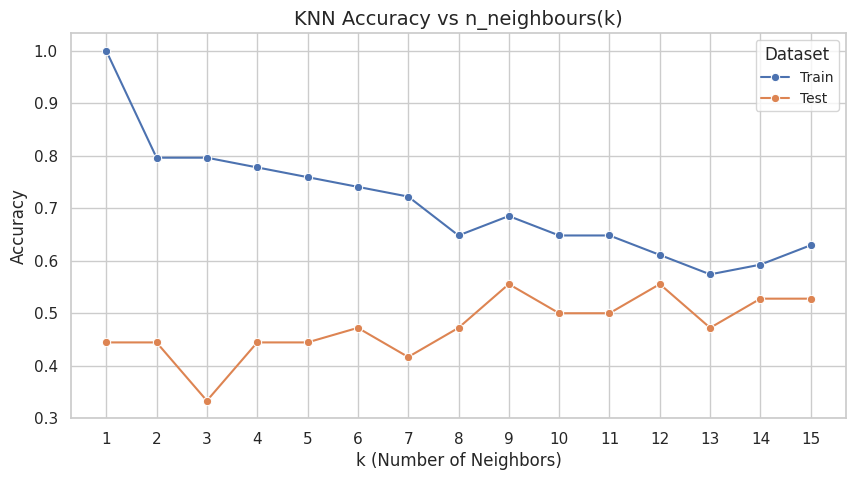

In [140]:
# creating an accuracy dataFrame for seaborne
accuracy_df = pd.DataFrame({
    'k': list(k_values) + list(k_values),
    'Accuracy': train_accuracies + test_accuracies,
    'Dataset': ['Train'] * len(k_values) + ['Test'] * len(k_values)
})

# plotting the training and test accuracy of the KNN model against k from 1-15
plt.figure(figsize=(10, 5))
sns.lineplot(data=accuracy_df, x='k', y='Accuracy', hue='Dataset', marker='o')
plt.title('KNN Accuracy vs n_neighbours(k)', fontsize=14)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.legend(title='Dataset', fontsize=10)
plt.show()

## <font color="red"> Task 3: </font> Identify the optimal $k$ in the above plot and report the corresponding test accuracy. [10pts]

*Note: this is not the rigorous way of tuning the hyperparameter $k$. We will discuss more in the cross-validation lecture.*

In [141]:
# identifying optimal k in the above plot
optimal_k = k_values[test_accuracies.index(max(test_accuracies))]
optimal_test_accuracy = max(test_accuracies)

print(f"Optimal k: {optimal_k}")
print(f"Test Accuracy at Optimal n_neighbours(k): {optimal_test_accuracy:.4f}")


Optimal k: 9
Test Accuracy at Optimal n_neighbours(k): 0.5556


While manually identifying the optimal n_neighbours by plotting and selecting the maximum accuracy can work, Grid Search CV is a more robust, systematic, and reliable approach. It ensures better generalization and reduces the risk of overfitting, making it the preferred method for hyperparameter tuning in machine learning. So I will use Grid Search CV

In [142]:
# # load necessary libraries
import numpy as np
from sklearn.model_selection import GridSearchCV

In [143]:
# perform Grid Search on the already initialised KNN model
grid_search = GridSearchCV(
    estimator=model_knn,
    param_grid={'n_neighbors': np.arange(15)+1},
    scoring='accuracy',
    cv=5,)

In [144]:
# fit the data
grid_search.fit(X_train_scaled, y_train_target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [145]:
# cross validation
grid_search.score(X_train_scaled, y_train_target)

0.6481481481481481

In [146]:
# making predictions on test data
y_test_pred = grid_search.predict(X_test_scaled)

In [147]:
# getting optimal n_neighbours(k)
optimal_k = grid_search.best_params_['n_neighbors']

# evaluating the accuracy of the model
optimal_test_accuracy = accuracy_score(y_test_target, y_test_pred)

print(f"Optimal n_neighbours(k): {grid_search.best_params_['n_neighbors']}")
print(f"Test Accuracy at Optimal n_neighbours(k): {optimal_test_accuracy:.4f}")

Optimal n_neighbours(k): 8
Test Accuracy at Optimal n_neighbours(k): 0.4722


## <font color="red"> Task 4: </font> Train a Logistic Regression classifier model, and report the training and test accuracy, respectively. [10 pts]

In [148]:
# load necessary libraries
from sklearn.linear_model import LogisticRegression

In [149]:
# initialize the Logistic Regression Classifier Model
model_logreg = LogisticRegression()

# fit the data to the logistic model
model_logreg.fit(X_train_scaled, y_train_target)

LogisticRegression()

In [150]:
# cross validation
model_logreg.score(X_train_scaled, y_train_target)

0.7222222222222222

In [151]:
# making predictions on test data
y_test_pred = model_logreg.predict(X_test_scaled)

In [152]:
# evaluating the accuracy of the model
test_accuracy_log_reg = accuracy_score(y_test_target, y_test_pred)
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log_reg:.4f}")

Test Accuracy (Logistic Regression): 0.5278


## <font color="red"> Task 5: </font> Calculate the probability that PU_ct>DO_ct in the *first* test sample. [10 pts]
*Note: the first test sample may be different under different Python versions.*

In [153]:
# Predict probabilities for the first test sample
first_sample = X_test_scaled.iloc[0].values.reshape(1, -1)
probabilities = model_logreg.predict_proba(first_sample)

# Probability that PU_ct > DO_ct (class 1)
probability_pu_gt_do = probabilities[0][1]

print(f"Probability that PU_ct > DO_ct for the first test sample: {probability_pu_gt_do:.4f}")

Probability that PU_ct > DO_ct for the first test sample: 0.4691


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## <font color="red"> Task 6: </font> Train a linear SVC model (C=10), and report the training and test accuracy, respectively. [10 pts]


In [154]:
# load necessary libraries
from sklearn.svm import SVC

In [155]:
# initialize the linear SVC model
model_lin_svc = SVC(kernel='linear', C=10)

# fit the training data to the linear SVC model
model_lin_svc.fit(X_train_scaled, y_train_target)

SVC(C=10, kernel='linear')

In [156]:
# cross validation
model_lin_svc.score(X_train_scaled, y_train_target)

0.6851851851851852

In [157]:
# make predictions on test data
y_test_pred = model_lin_svc.predict(X_test_scaled)

In [158]:
# evaluating the train and test accuracy scrore
test_accuracy_linear_svc = accuracy_score(y_test_target, y_test_pred)
print(f"Test Accuracy (Linear SVC): {test_accuracy_linear_svc:.4f}")

Test Accuracy (Linear SVC): 0.5000


## <font color="red"> Task 7: </font> Train a nonlinear SVC model with RBF kernel (C=10), and report the training and test accuracy, respectively. [10 pts]


In [159]:
# initilize SVC model with RBF
model_nonlin_svc = SVC(kernel='rbf', C=10)

# fit the training data to the SVC model
model_nonlin_svc.fit(X_train_scaled, y_train_target)

SVC(C=10)

In [160]:
# cross validation
model_nonlin_svc.score(X_train_scaled, y_train_target)

0.8148148148148148

In [161]:
# make predictions on the test data
y_test_pred = model_nonlin_svc.predict(X_test_scaled)

In [162]:
# evaluate the accuracy of the model
test_accuracy_nonlin_svc = accuracy_score(y_test_target, y_test_pred)
print(f"Test Accuracy (Nonlinear SVC): {test_accuracy_rbf_svc:.4f}")

Test Accuracy (Nonlinear SVC): 0.5000


## <font color="red"> Task 8: </font> Among the KNN, Logisitc Regression, linear SVC, nonlinear SVC with RBF Kernel, which one performs the best? [10pts]

In [163]:
# Create a dictionary to store the test accuracies
test_accuracies = {
    'KNN': test_accuracy_knn,
    'KNN (Grid Search)': optimal_test_accuracy,
    'Logistic Regression': test_accuracy_log_reg,
    'Linear SVC': test_accuracy_linear_svc,
    'Nonlinear SVC': test_accuracy_nonlin_svc
}
test_accuracies

{'KNN': 0.4444444444444444,
 'KNN (Grid Search)': 0.4722222222222222,
 'Logistic Regression': 0.5277777777777778,
 'Linear SVC': 0.5,
 'Nonlinear SVC': 0.5}

In [164]:
# picking best model from KNN, Logisitc Regression, linear SVC, nonlinear SVC with RBF Kernel
best_model = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model]
print(f"Best Model: {best_model} with Test Accuracy: {best_accuracy:.4f}")

Best Model: Logistic Regression with Test Accuracy: 0.5278


**Conclusion**

Looking at the evaluated models—KNN, KNN (Grid Search), Logistic Regression, Linear SVC, and Nonlinear SVC with RBF Kernel, the accuracy scores point to the Logistic Regression model as the best one with the highest accuracy test score of approximately 52.78%.

The other evaluated models proved the following:
- the KNN model  had the lowest accuracy (44.44%), while KNN with Grid Search  improved slightly (47.22%) but still underperformed compared to other models.
- both the Linear SVC and Nonlinear SVC provided a similar moderate accuracy result (50%) but did not surpass the Logistic Regression.

Therefore this classification task proved that a linear decision boundary (as used in Logistic Regression) is more effective than KNN or SVC-based models, even with hyperparameter tuning.